# Chapter 4: Dimension Reduction
## Import required packages

Make sure DMBA package is available

In [21]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [22]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

import dmba

%matplotlib inline


## Table 4.2 and Table 4.3

In [23]:
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [24]:
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


Compute mean, standard deviation, min, max, median, length, and missing values of CRIM

In [25]:
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))
print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Mean :  3.613523557312254
Std. dev :  8.60154510533249
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


Compute mean, standard dev., min, max, median, length, and missing values for all variables

In [26]:
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


## In-class demonstration of Over fitting issue

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Re-define the features and target
X = bostonHousing_df.drop(columns=["MEDV", "CAT_MEDV"])  # Features
y = bostonHousing_df["CAT_MEDV"]  # Target (binary)

# Re-split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define polynomial degrees explicitly for each complexity level
complexity_levels_explicit = {
    "Too Simple (2 Variables)": {"features": X_train[["RM", "LSTAT"]], "degree": None},
    "Moderate Complexity (All Variables)": {"features": X_train, "degree": None},
    "High Complexity (Polynomials, Degree 2)": {"features": PolynomialFeatures(degree=2).fit_transform(X_train), "degree": 2},
    "Very High Complexity (Polynomials, Degree 3)": {"features": PolynomialFeatures(degree=3).fit_transform(X_train), "degree": 3},
    "Extreme Complexity (Polynomials, Degree 4)": {"features": PolynomialFeatures(degree=4).fit_transform(X_train), "degree": 4}
}

# Fit models and evaluate performance
complexity_results_final = []
for name, config in complexity_levels_explicit.items():
    model = LinearRegression()  # Using Linear Regression for all complexity levels
    features = config["features"]
    degree = config["degree"]

    # Train the model
    model.fit(features, y_train)

    # Determine the test set transformation
    if degree is None:  # Simple and moderate complexity
        test_features = X_test[["RM", "LSTAT"]] if "Too Simple" in name else X_test
    else:  # Polynomial complexity
        test_features = PolynomialFeatures(degree=degree).fit_transform(X_test)

    # Predictions and evaluation
    y_pred = np.round(model.predict(test_features)).astype(int)  # Round to nearest integer for binary classification
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    complexity_results_final.append({"Model Complexity": name, "Accuracy": acc, "Confusion Matrix": cm})

# Convert results to a DataFrame for easier viewing
complexity_results_final_df = pd.DataFrame(complexity_results_final)

# Display the results DataFrame without using the custom tool
complexity_results_final_df

,Model Complexity,Accuracy,Confusion Matrix
0,Too Simple (2 Variables),0.927632,"[[0, 0, 0], [2, 132, 0], [0, 9, 9]]"
1,Moderate Complexity (All Variables),0.947368,"[[131, 3], [5, 13]]"
2,"High Complexity (Polynomials, Degree 2)",0.940789,"[[0, 0, 0], [1, 131, 2], [0, 6, 12]]"
3,"Very High Complexity (Polynomials, Degree 3)",0.473684,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"Extreme Complexity (Polynomials, Degree 4)",0.664474,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


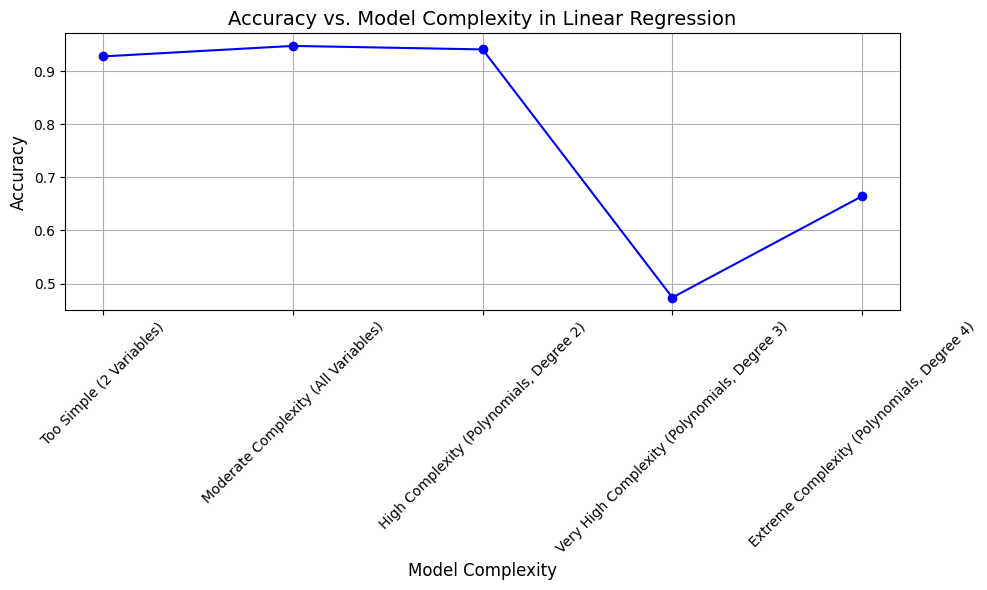

In [39]:
import matplotlib.pyplot as plt

# Prepare data for visualization
model_complexities = [result["Model Complexity"] for result in complexity_results_final]
accuracies = [result["Accuracy"] for result in complexity_results_final]

# Plot accuracy vs. model complexity
plt.figure(figsize=(10, 6))
plt.plot(model_complexities, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Model Complexity in Linear Regression", fontsize=14)
plt.xlabel("Model Complexity", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Function to get polynomial equation as a string
def get_polynomial_equation(model, degree):
    coefs = model.coef_
    intercept = model.intercept_
    terms = [f"{intercept:.2f}"]
    
    for i, coef in enumerate(coefs[1:], start=1):  # Skip intercept
        terms.append(f"{coef:.2f} * x^{i}")
        
    equation = " + ".join(terms)
    return f"Degree {degree}: y = {equation}"

# Generate and display equations for each degree
equations = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    equations.append(get_polynomial_equation(model, degree))

# Print equations
for eq in equations:
    print(eq)


Degree 1: y = -0.95 + 2.77 * x^1
Degree 2: y = 2.02 + 2.77 * x^1 + -0.99 * x^2
Degree 3: y = 2.02 + -0.04 * x^1 + -0.99 * x^2 + 0.52 * x^3
Degree 6: y = 1.82 + -0.32 * x^1 + -0.80 * x^2 + 0.66 * x^3 + -0.01 * x^4 + -0.01 * x^5 + -0.00 * x^6
Degree 9: y = 1.88 + -0.10 * x^1 + -1.05 * x^2 + 0.41 * x^3 + 0.14 * x^4 + 0.06 * x^5 + -0.03 * x^6 + -0.01 * x^7 + 0.00 * x^8 + 0.00 * x^9


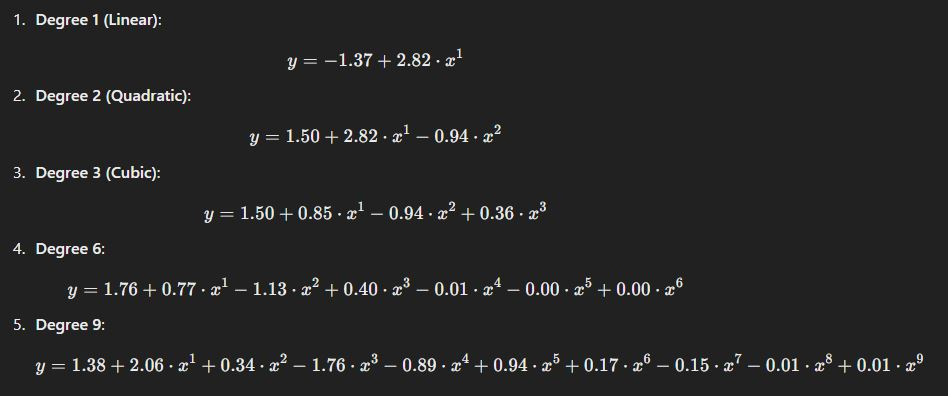

In [53]:
from IPython.display import Image

# Display image from a file
Image(filename='C:/Users/lzl278/Pictures/overfitting.jpg') # this code needs imnage for display

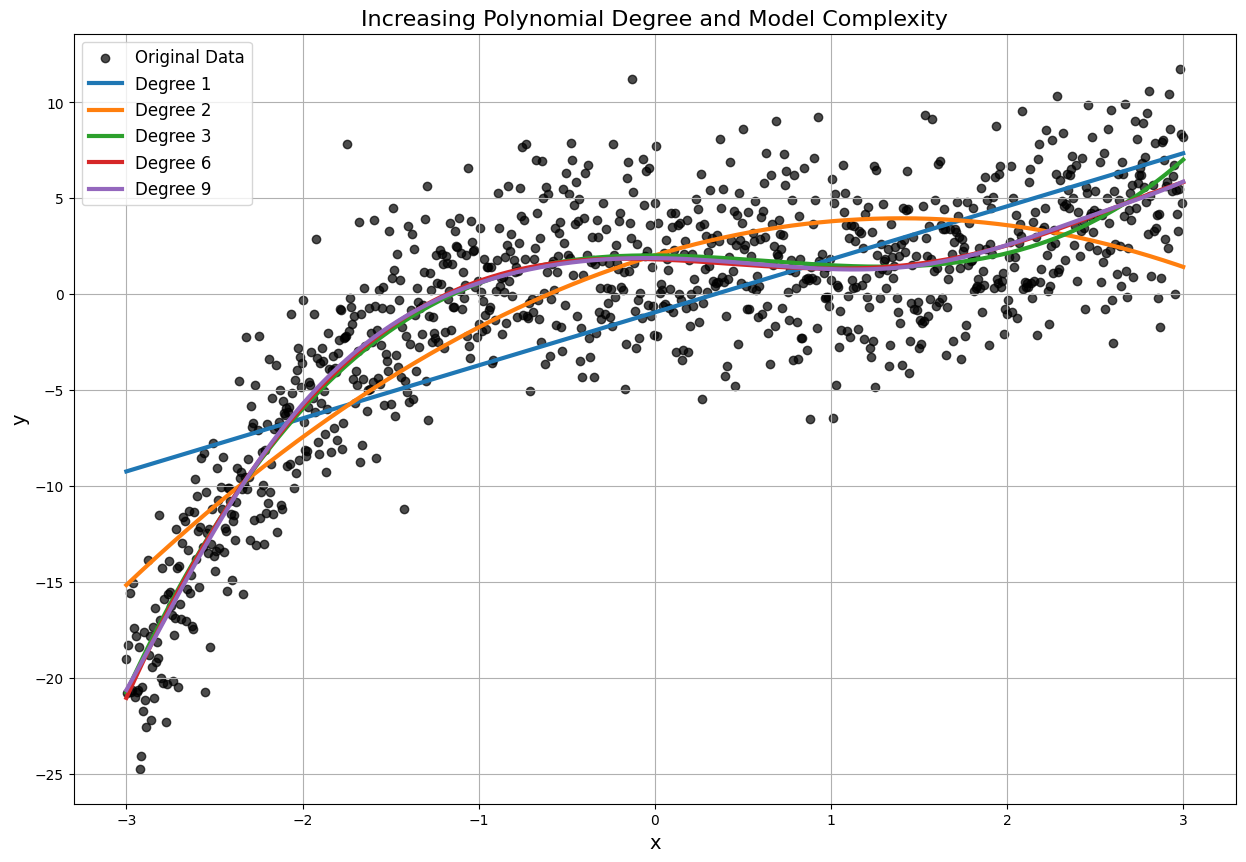

In [54]:
# Plot with thicker lines
plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='black', label="Original Data", alpha=0.7)

# Plot polynomial models with thicker lines
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Transform input features
    model = LinearRegression()
    model.fit(X_poly, y)  # Fit model
    y_pred = model.predict(X_poly)  # Predict
    plt.plot(x, y_pred, label=f"Degree {degree}", linewidth=3)  # Thicker line

# Add plot details
plt.title("Increasing Polynomial Degree and Model Complexity", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


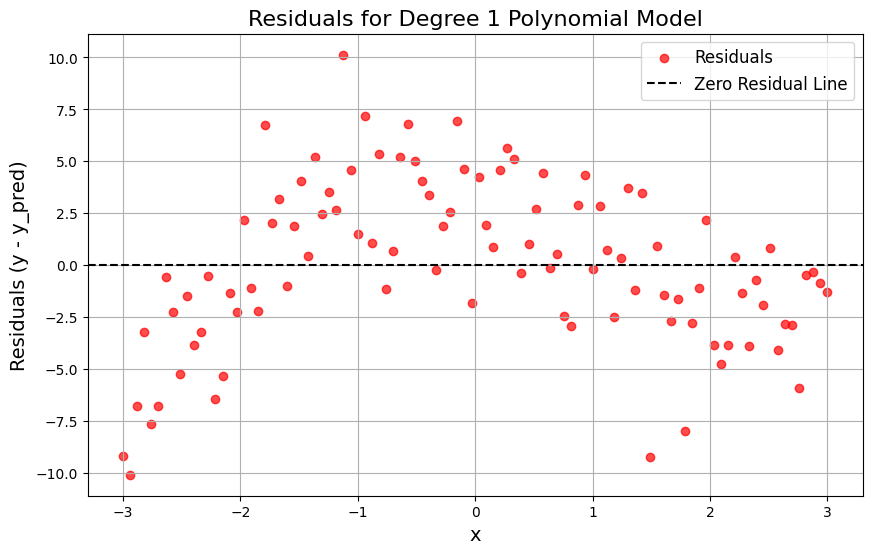

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(42)
x = np.linspace(-3, 3, 100)
y = 0.5 * x**3 - x**2 + 2 + np.random.normal(scale=3, size=len(x))  # Cubic data with noise

# Calculate residuals for the first model (Degree 1)
degree = 1
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))  # Transform input features
model = LinearRegression()
model.fit(X_poly, y)  # Fit model
y_pred = model.predict(X_poly)  # Predict
residuals = y - y_pred  # Residuals

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='red', alpha=0.7, label="Residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label="Zero Residual Line")
plt.title("Residuals for Degree 1 Polynomial Model", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Residuals (y - y_pred)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


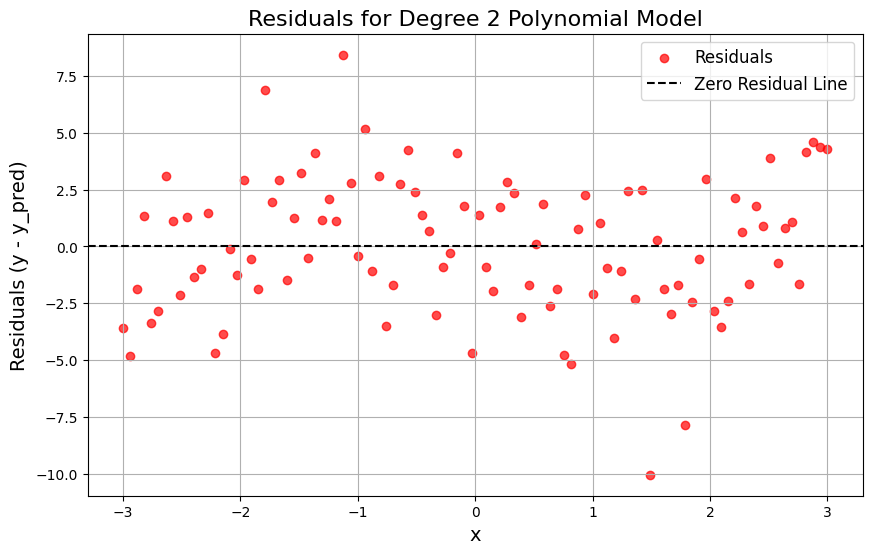

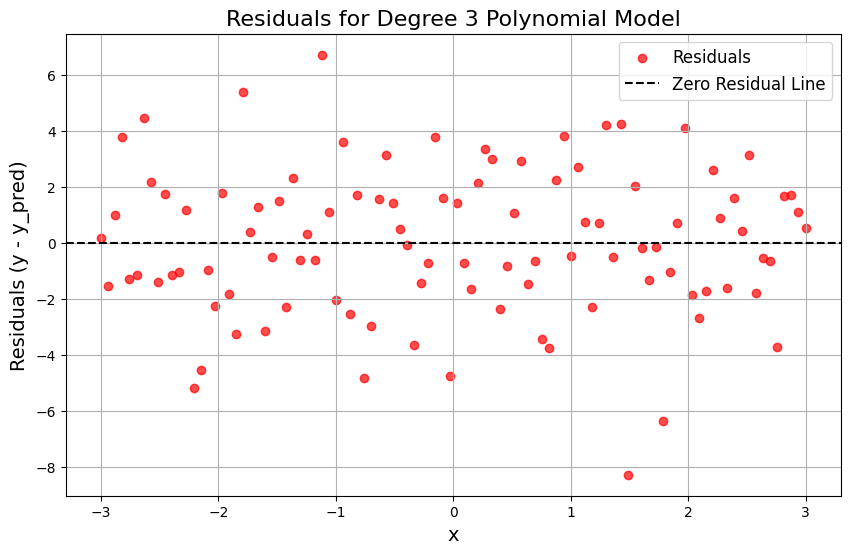

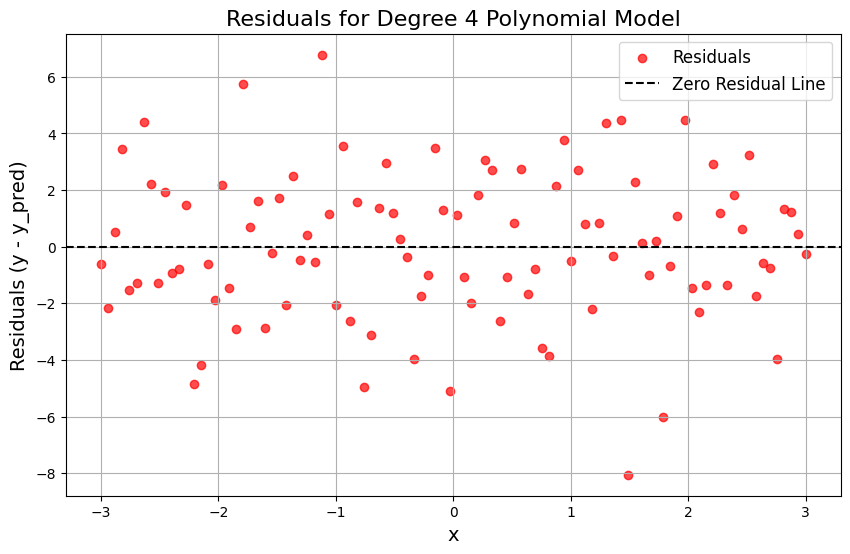

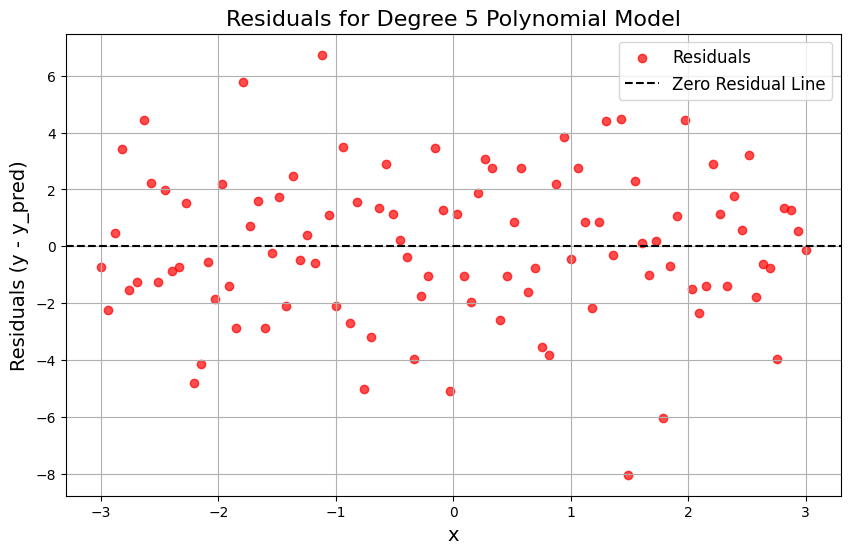

In [59]:
# Define a function to plot residuals for a given polynomial degree
def plot_residuals_for_degree(degree, x, y):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Transform input features
    model = LinearRegression()
    model.fit(X_poly, y)  # Fit model
    y_pred = model.predict(X_poly)  # Predict
    residuals = y - y_pred  # Residuals

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(x, residuals, color='red', alpha=0.7, label="Residuals")
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label="Zero Residual Line")
    plt.title(f"Residuals for Degree {degree} Polynomial Model", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("Residuals (y - y_pred)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Plot residuals for models with degrees 2, 3, 4, and 5
for degree in [2, 3, 4, 5]:
    plot_residuals_for_degree(degree, x, y)

## Table 4.4

In [61]:
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


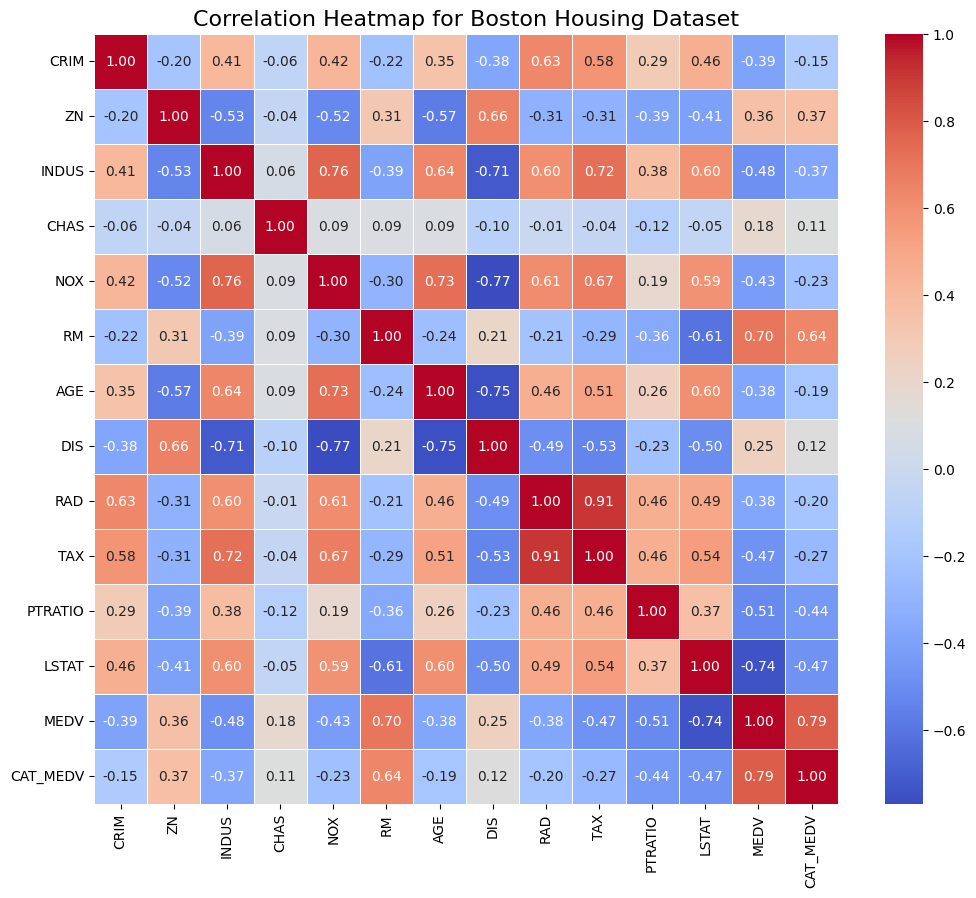

In [69]:
import seaborn as sns

correlation_matrix = bostonHousing_df.corr().round(2)
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Boston Housing Dataset", fontsize=16)
plt.show()

## Table 4.5

In [70]:
bostonHousing_df.CHAS.value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

## Table 4.6
Create bins of size 1 for variable using the method `pd.cut`. By default, the method creates a categorical variable, e.g. `(6,7]`. The argument `labels=False` determines integers instead, e.g. `6`.

In [71]:
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
bostonHousing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


Compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the `groupby` method, then restrict the analysis to MEDV and determine the mean for each group.

In [72]:
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

## Table 4.7

In [73]:
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)

In [74]:
mlt = pd.melt(bostonHousing_df, id_vars=['RM_bin', 'CHAS'], 
              value_vars=['MEDV'])
mlt.head()

,RM_bin,CHAS,variable,value
0,6,0,MEDV,24.0
1,6,0,MEDV,21.6
2,7,0,MEDV,34.7
3,6,0,MEDV,33.4
4,7,0,MEDV,36.2


In [75]:
pd.pivot_table(mlt, values='value', index=['RM_bin'], columns=['CHAS'],
               aggfunc=np.mean, margins=True)

C:\Users\lzl278\AppData\Local\Temp\ipykernel_36600\3819898002.py:1: FutureWarning: The provided callable <function mean at 0x000002417EACB9C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(mlt, values='value', index=['RM_bin'], columns=['CHAS'],
C:\Users\lzl278\AppData\Local\Temp\ipykernel_36600\3819898002.py:1: FutureWarning: The provided callable <function mean at 0x000002417EACB9C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(mlt, values='value', index=['RM_bin'], columns=['CHAS'],
C:\Users\lzl278\AppData\Local\Temp\ipykernel_36600\3819898002.py:1: FutureWarning: The provided callable <function mean at 0x000002417EACB9C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, 

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [14]:
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


## Figure 4.1
Use the method `pd.crosstab` for cross tabulation of two variables. In a second step, we convert the counts into percentages along the columns.

In [80]:
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)
propTbl = tbl / tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


In [81]:
tbl

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


The dataframe method `plot` allows creating various graphs. The graph is created using `matplotlib` and therefore can be further manipulated.

C:\Users\lzl278\AppData\Local\Temp\ipykernel_36600\3432720014.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


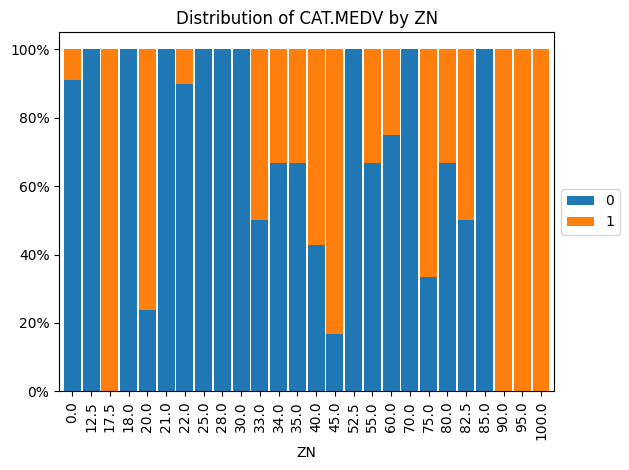

In [82]:
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Demonstration of Category Reduction

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data
data = {
    "Region": ["North", "North", "North", "South", "South", "South", "South", 
               "East", "East", "East", "West", "West", "West", "West"],
    "Purchase_Made": [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

In [87]:
df

,Region,Purchase_Made
0,North,1
1,North,1
2,North,1
3,South,0
4,South,0
5,South,0
6,South,0
7,East,0
8,East,1
9,East,1



Proportions of Purchase_Made by Region:
Purchase_Made         0         1
Region                           
East           0.333333  0.666667
North          0.000000  1.000000
South          1.000000  0.000000
West           0.000000  1.000000


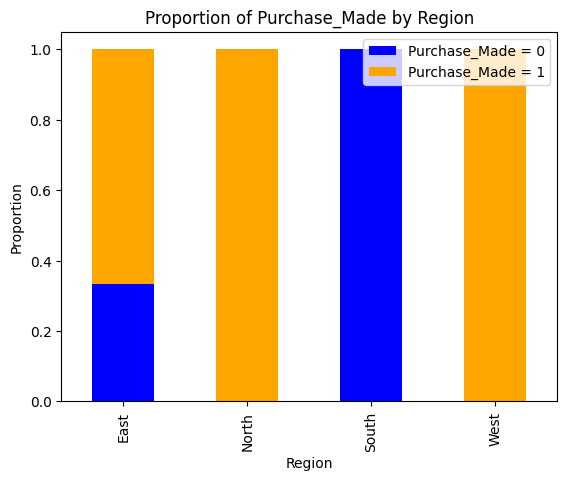

In [88]:
# Group by Region and calculate proportions
region_distribution = df.groupby("Region")["Purchase_Made"].value_counts(normalize=True).unstack()

# Fill missing values with 0
region_distribution = region_distribution.fillna(0)

print("\nProportions of Purchase_Made by Region:")
print(region_distribution)

# Visualize the distribution
region_distribution.plot(kind="bar", stacked=True, color=["blue", "orange"])
plt.title("Proportion of Purchase_Made by Region")
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.legend(["Purchase_Made = 0", "Purchase_Made = 1"])
plt.show()


Data after Combining Categories:
   Region  Purchase_Made Region_Combined
0   North              1       NorthWest
1   North              1       NorthWest
2   North              1       NorthWest
3   South              0           South
4   South              0           South
5   South              0           South
6   South              0           South
7    East              0            East
8    East              1            East
9    East              1            East
10   West              1       NorthWest
11   West              1       NorthWest
12   West              1       NorthWest
13   West              1       NorthWest

Proportions of Purchase_Made by Combined Region:
Purchase_Made           0         1
Region_Combined                    
East             0.333333  0.666667
NorthWest        0.000000  1.000000
South            1.000000  0.000000


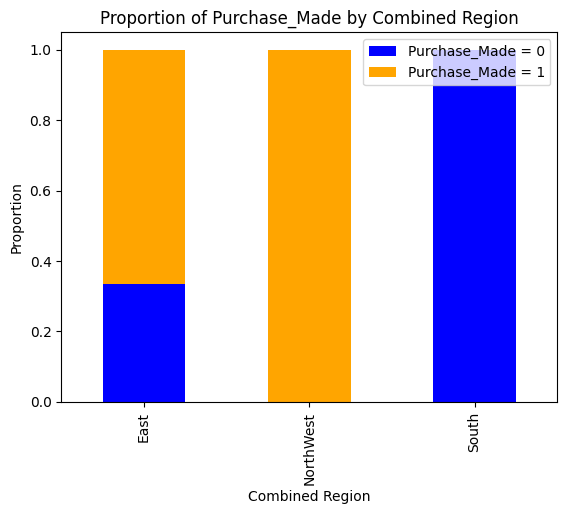

In [89]:
# Combine low-separation categories
df["Region_Combined"] = df["Region"].replace({"North": "NorthWest", "West": "NorthWest"})

# Verify the new dataset
print("\nData after Combining Categories:")
print(df)

# Recalculate proportions with combined categories
combined_distribution = df.groupby("Region_Combined")["Purchase_Made"].value_counts(normalize=True).unstack()

# Fill missing values with 0
combined_distribution = combined_distribution.fillna(0)

print("\nProportions of Purchase_Made by Combined Region:")
print(combined_distribution)

# Visualize the new distribution
combined_distribution.plot(kind="bar", stacked=True, color=["blue", "orange"])
plt.title("Proportion of Purchase_Made by Combined Region")
plt.xlabel("Combined Region")
plt.ylabel("Proportion")
plt.legend(["Purchase_Made = 0", "Purchase_Made = 1"])
plt.show()

## Table 4.10
Compute principal components on two dimensions

In [141]:
cereals_df = dmba.load_data('Cereals.csv')
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

PCA(n_components=2)

The importance of components can be assessed using the explained variance.

In [142]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


The `components_` field of `pcs` gives the individual components. The columns in this matrix are the principal components `PC1`, `PC2`. The rows are variables in the order they are found in the input matrix, `calories` and `rating`.

In [143]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'], 
                                index=['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,0.847053,0.531508
rating,-0.531508,0.847053


Use the `transform` method to get the scores.

In [144]:
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]), 
                      columns=['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,-44.921528,2.197183
1,15.725265,-0.382416
2,-40.149935,-5.407212
3,-75.310772,12.999126
4,7.041508,-5.357686


## Table 4.11
Perform a principal component analysis of the whole table ignoring the first three non-numerical columns.

In [145]:
pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


In [146]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,-0.000757,0.008801,0.001026,0.003200,0.056176
fat,-0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,-0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,-0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,-0.001541,0.004360,0.012489,0.005647,-0.007876


## Table 4.12
We kept the Tableau graphic in the book, however these code snippets demonstrate how a similar graph could be generated using Python

Use the preprocessing functionality in scikit-learn to standardize the data before the PCA

In [147]:
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [148]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,0.393148,0.114857,-0.204359,0.203899
protein,0.307356,0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,-0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,0.265050,-0.001531,0.638879,0.329101


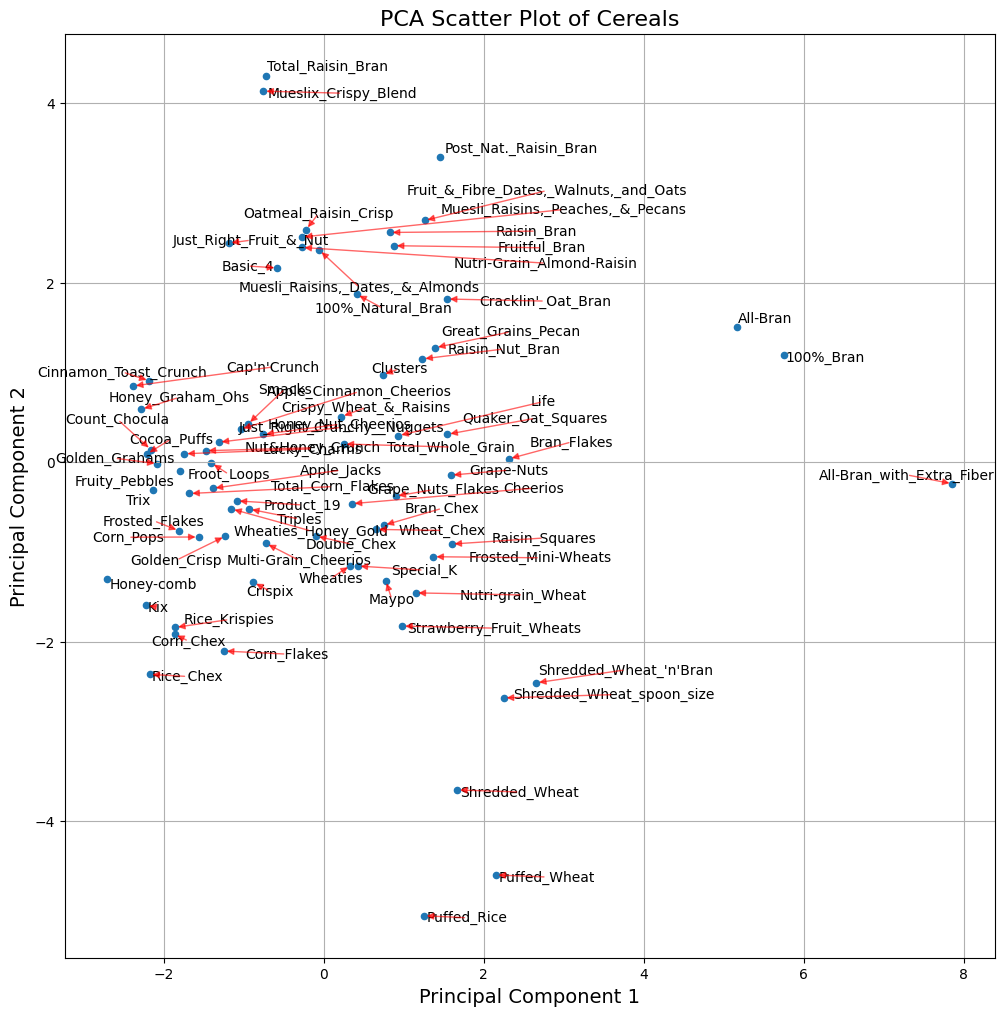

In [149]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Assuming cereals_df and pcs (PCA object) are defined

# Prepare the data
cereals_red_df = cereals_df.dropna(axis=0).reset_index(drop=True)

# PCA scores
scores = pd.DataFrame(
    pcs.fit_transform(preprocessing.scale(cereals_red_df.iloc[:, 3:].dropna(axis=0))),
    columns=[f'PC{i}' for i in range(1, 14)]
)
cereals_pca_df = pd.concat([cereals_red_df['name'].dropna(axis=0), scores[['PC1', 'PC2']]], axis=1)

# figure size
fig, ax = plt.subplots(figsize=(12, 12))  # Increased figure size
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', ax=ax)

# Prepare text annotations
points = cereals_pca_df[['PC1', 'PC2', 'name']]
texts = [ax.text(x, y, s, fontsize=10) for _, (x, y, s) in points.iterrows()]  # Reduced font size

# Adjust text positions to reduce overlap
adjust_text(
    texts,
    force_text=0.2,  # Increased force to spread labels more
    force_points=0.2,
    arrowprops=dict(arrowstyle="-|>", color='red', alpha=0.6)
)

# Title and labels
plt.title("PCA Scatter Plot of Cereals", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


C:\Users\lzl278\AppData\Local\Temp\ipykernel_36600\2602480896.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  points.groupby(['cluster']).apply(lambda g: extractPoint(g, texts))


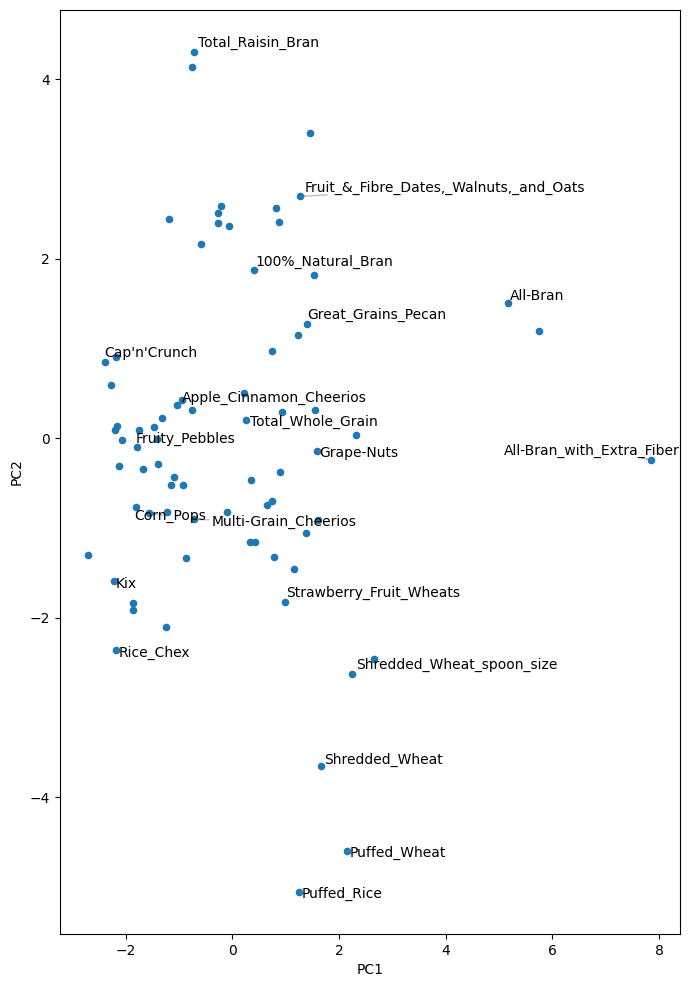

In [150]:
from sklearn.cluster import KMeans

cereals_pca_df = pd.concat([cereals_df['name'], scores], axis=1) #ignore_index=True)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(8, 12))
points = pd.DataFrame(points)

def extractPoint(df, texts):
    for _, (x, y, s) in df.sample(1)[['PC1','PC2','name']].iterrows():
        texts.append(ax.text(x, y, s))

kmeans = KMeans(n_clusters=20, random_state=0).fit(points[['PC1', 'PC2']])
points['cluster'] = kmeans.labels_
texts = []
points.groupby(['cluster']).apply(lambda g: extractPoint(g, texts))

adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='grey', alpha=0.5))
plt.show()

## Table 4.13

In [151]:
wine_df = dmba.load_data('Wine.csv')
wine_df = wine_df.drop(columns=['Type'])

In [152]:
pcs = PCA()
pcs.fit(wine_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [153]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=wine_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.001659,0.001203,0.016874,0.141447,-0.020337
Malic_Acid,-0.000681,0.002155,0.122003,0.160390,0.612883
Ash,0.000195,0.004594,0.051987,-0.009773,-0.020176
Ash_Alcalinity,-0.004671,0.026450,0.938593,-0.330965,-0.064352
Magnesium,0.017868,0.999344,-0.029780,-0.005394,0.006149
Total_Phenols,0.000990,0.000878,-0.040485,-0.074585,-0.315245
Flavanoids,0.001567,-0.000052,-0.085443,-0.169087,-0.524761
Nonflavanoid_Phenols,-0.000123,-0.001354,0.013511,0.010806,0.029648
Proanthocyanins,0.000601,0.005004,-0.024659,-0.050121,-0.251183
Color_Intensity,0.002327,0.015100,0.291398,0.878894,-0.331747


## Selecting the number of Principal Component 1 (95% variance explained)

In [154]:
import numpy as np

explained_variance = [0.4, 0.3, 0.15, 0.10, 0.05]  # Example variance explained by PCs
cumulative_variance = np.cumsum(explained_variance)  # Cumulative sum
threshold = 0.95  # 95% variance

# Find the number of PCs needed
num_pcs = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of PCs to retain 95% variance: {num_pcs}")

Number of PCs to retain 95% variance: 4


## Selecting the number of Principal Component 2 (Elbow method)

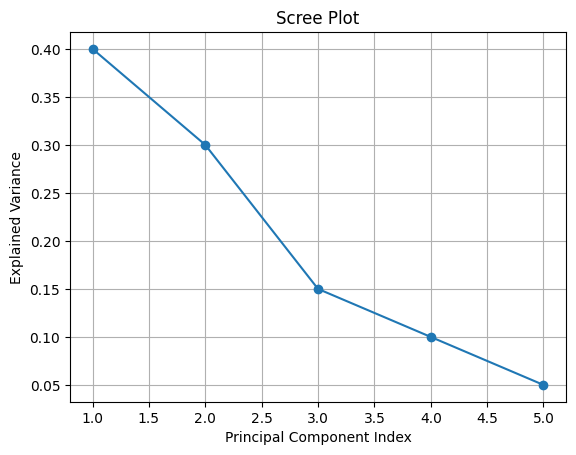

In [155]:
import matplotlib.pyplot as plt

explained_variance = [0.4, 0.3, 0.15, 0.10, 0.05]
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

## Selecting the number of Principal Component 2 (Kaiser Criterion)
Retain PCs with eigenvalues greater than 1

## PCA on Caloires and Score

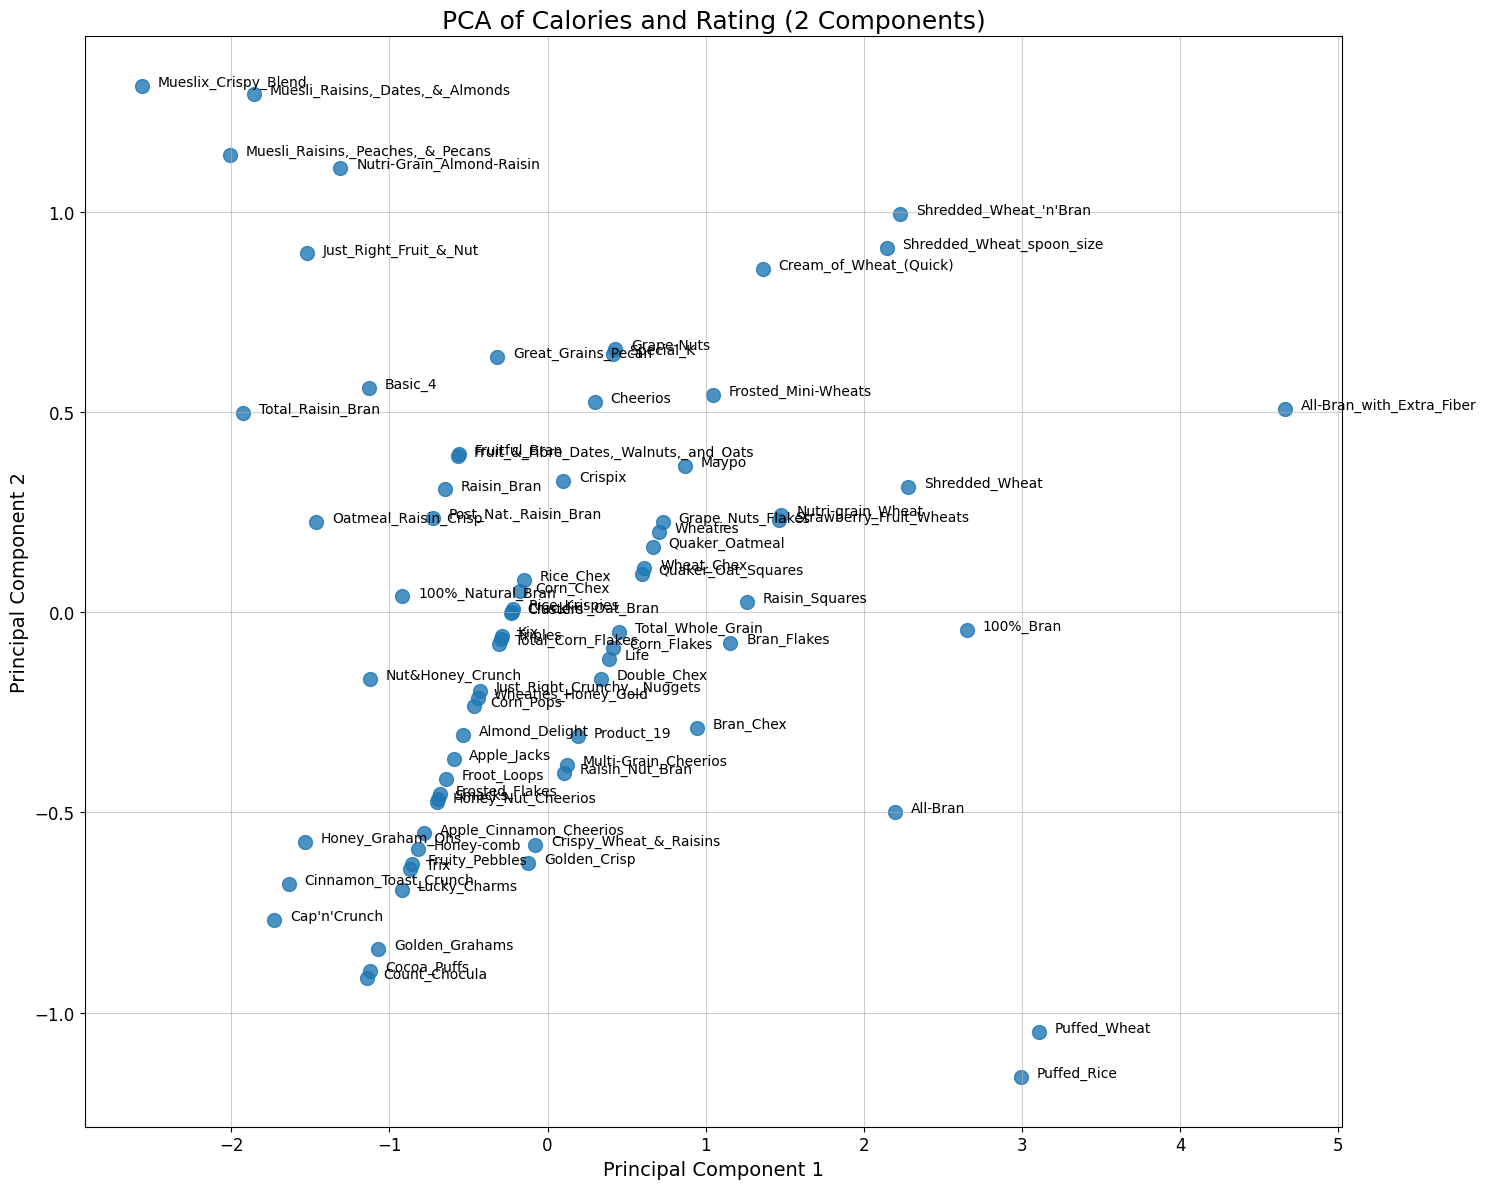

In [158]:
# Create a PCA plot
plt.figure(figsize=(15, 12))  

# Scatter plot with points
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.8, s=100, label="Cereal")

# Add text labels with offsets to avoid overlap
for i, name in enumerate(pca_df['name']):
    plt.text(pca_df['PC1'][i] + 0.1, pca_df['PC2'][i], name, fontsize=10)

# Title and axes labels
plt.title("PCA of Calories and Rating (2 Components)", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.6)

# Show the improved chart
plt.tight_layout()
plt.show()


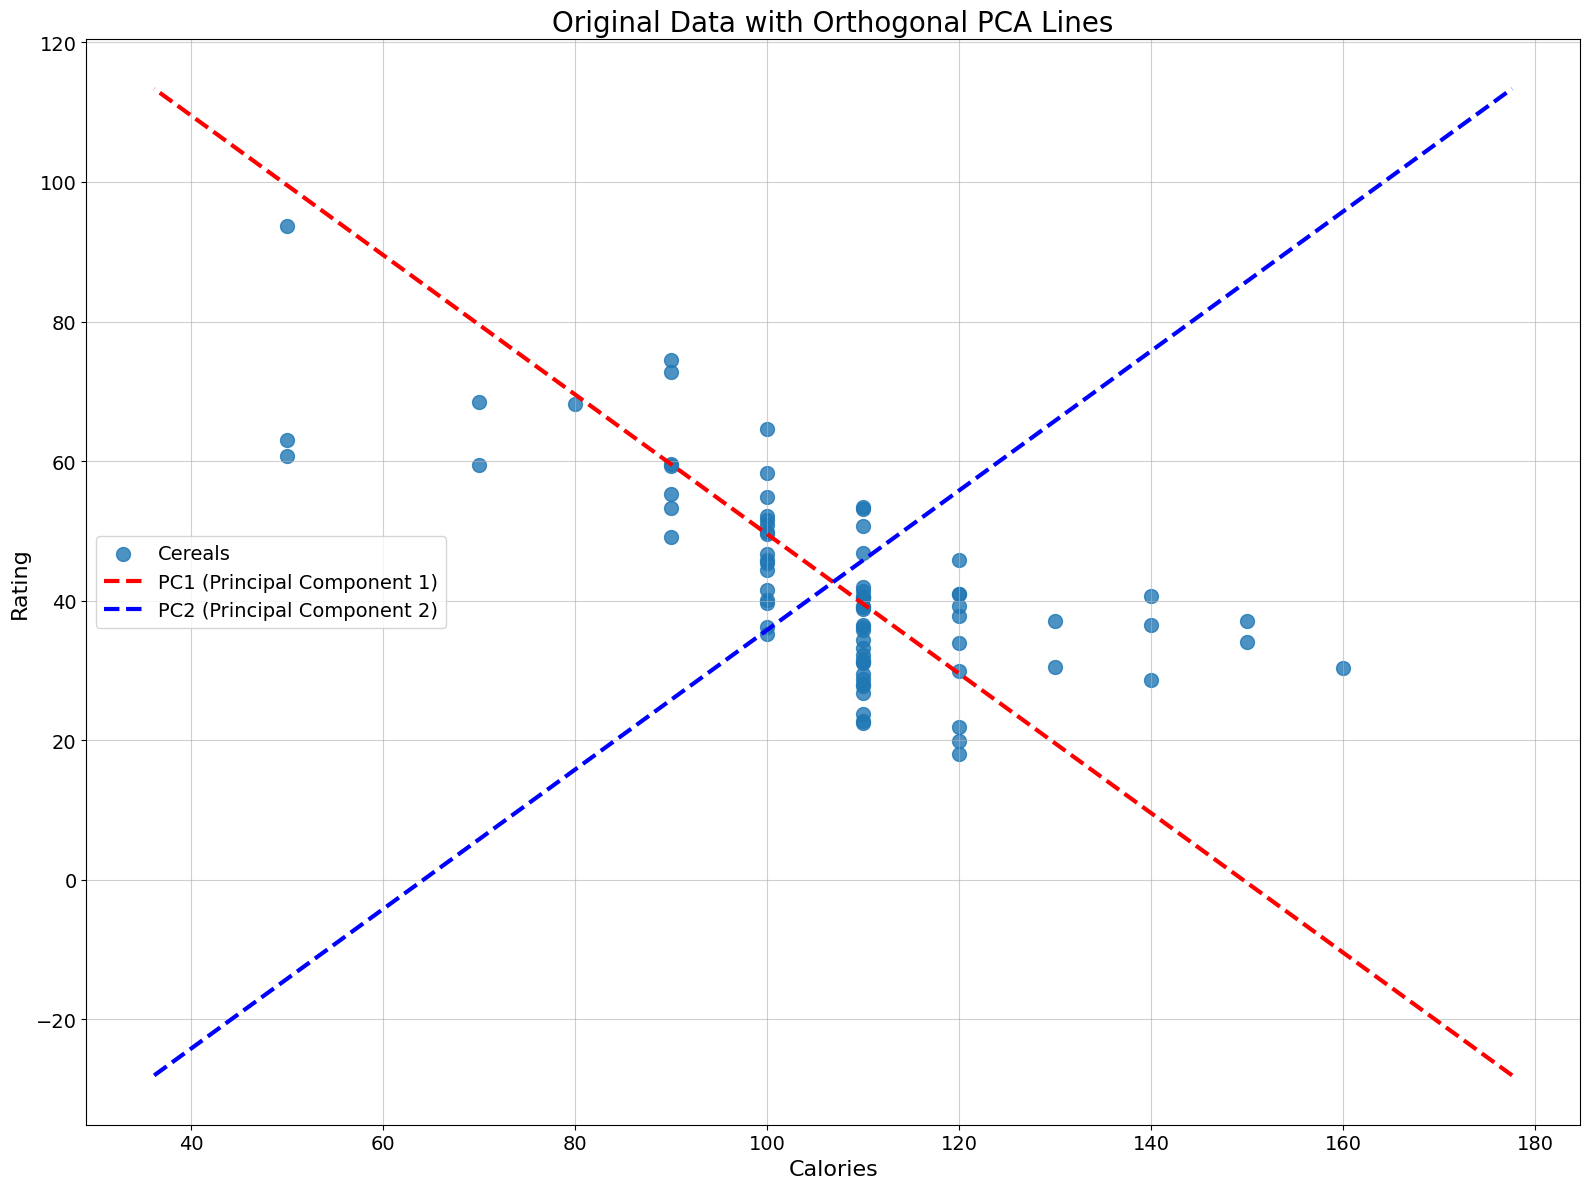

In [168]:
# Define the PCA lines with proper scaling for extended visualization
scaling_factor = 100  # Adjust the scaling to ensure the lines are sufficiently long

# Calculate the extended lines using the PCA components to ensure orthogonality
pc1_line_orthogonal = np.array([
    mean_data + t * scaling_factor * pca_components[0] for t in np.linspace(-1, 1, 100)
])
pc2_line_orthogonal = np.array([
    mean_data + t * scaling_factor * pca_components[1] for t in np.linspace(-1, 1, 100)
])

# Plot the original data with orthogonal PCA lines
plt.figure(figsize=(16, 12))

# Scatter plot of the original data
plt.scatter(original_data['calories'], original_data['rating'], alpha=0.8, s=100, label="Cereals")

# Plot the orthogonal PCA lines
plt.plot(
    pc1_line_orthogonal[:, 0],
    pc1_line_orthogonal[:, 1],
    label='PC1 (Principal Component 1)',
    color='red',
    linestyle='--',
    linewidth=3,
)
plt.plot(
    pc2_line_orthogonal[:, 0],
    pc2_line_orthogonal[:, 1],
    label='PC2 (Principal Component 2)',
    color='blue',
    linestyle='--',
    linewidth=3,
)

# Add titles and labels with larger font sizes
plt.title("Original Data with Orthogonal PCA Lines", fontsize=20)
plt.xlabel("Calories", fontsize=16)
plt.ylabel("Rating", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.6)

# Show the updated plot
plt.tight_layout()
plt.show()


## Variable Clustering

In [169]:
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [172]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Extract numeric columns for clustering
numeric_cols = cereals_df.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
numeric_data = numeric_cols.dropna()

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Perform hierarchical clustering using the correlation matrix
linkage_matrix = linkage(correlation_matrix, method='ward')

In [173]:
correlation_matrix

,calories,protein,fat,sodium,fiber,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.032243,0.297539,0.247226,-0.513061,0.584160
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,0.299262,1.000000,0.190762,-0.335269,0.025159
weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.320324,0.190762,1.000000,-0.199583,-0.298124
cups,0.087200,-0.244469,-0.175892,0.119665,-0.513061,0.128405,-0.335269,-0.199583,1.000000,-0.203160
rating,-0.689376,0.470618,-0.409284,-0.401295,0.584160,-0.240544,0.025159,-0.298124,-0.203160,1.000000


In [174]:
linkage_matrix

array([[ 1.        ,  4.        ,  0.86507036,  2.        ],
       [ 0.        ,  7.        ,  0.91850849,  2.        ],
       [ 3.        ,  5.        ,  0.99239966,  2.        ],
       [ 2.        , 11.        ,  1.25643759,  3.        ],
       [ 9.        , 10.        ,  1.37640432,  3.        ],
       [ 6.        , 13.        ,  1.66185538,  4.        ],
       [ 8.        , 12.        ,  1.709906  ,  3.        ],
       [15.        , 16.        ,  2.22505206,  7.        ],
       [14.        , 17.        ,  3.69141337, 10.        ]])

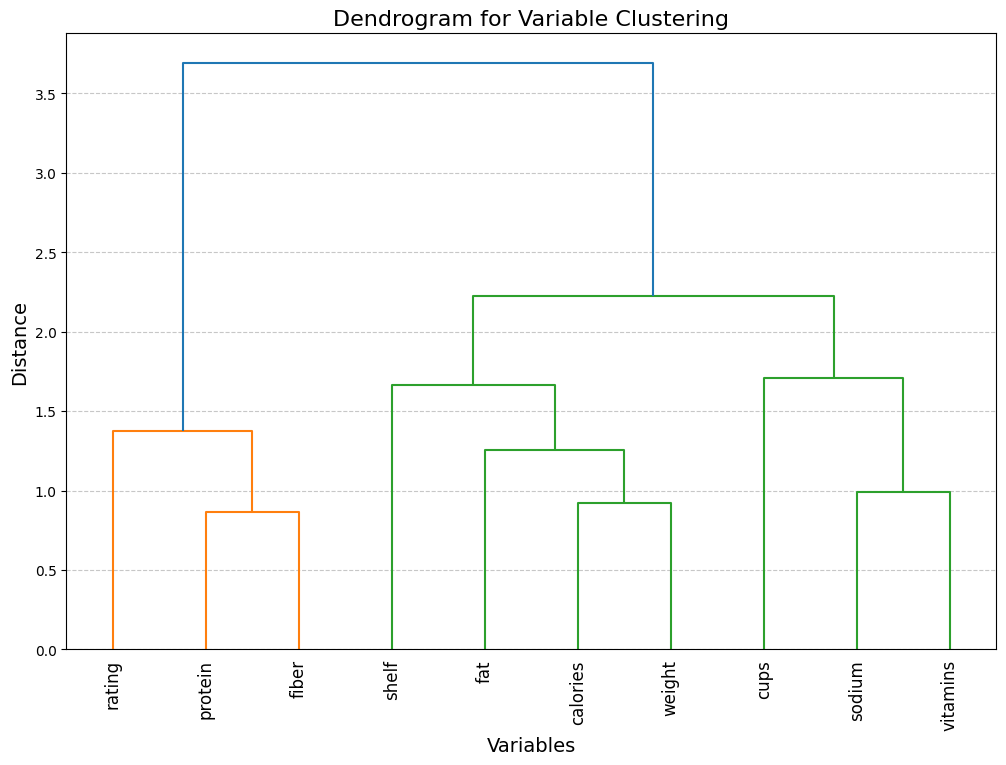

In [171]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogram for Variable Clustering", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
